<a href="https://colab.research.google.com/github/nixme1122004/F1-predictions/blob/main/F1_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.0/123.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for msgpack: filename=msgpack-1.0.2-cp312-cp312-linux_x86_64.whl size=15820 sha256=b5773408c4e305a16b075ec6ea1771c73368aa177dbbdb45f960c79192fcc236
  Stored in directory: /root/.cache/pip/wheels/67/a6/40/eda0983e595bbf3841af96dbff2340be72dfac96796fc3d578
Successfully built msgpack
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.1.2
    Uninstalling msgpack-1.1.2:
      Successfully uninstalled msgpack-1.1.2
  Attempting uninstall: websocket

In [ ]:
import fastf1

print(laps['Team'].unique())


['McLaren' 'Mercedes' 'Ferrari' 'Red Bull Racing' 'Alpine' 'Haas F1 Team'
 'Williams' 'Racing Bulls' 'Aston Martin' 'Kick Sauber']


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

Red Bull drivers found: ['PIA' 'NOR']


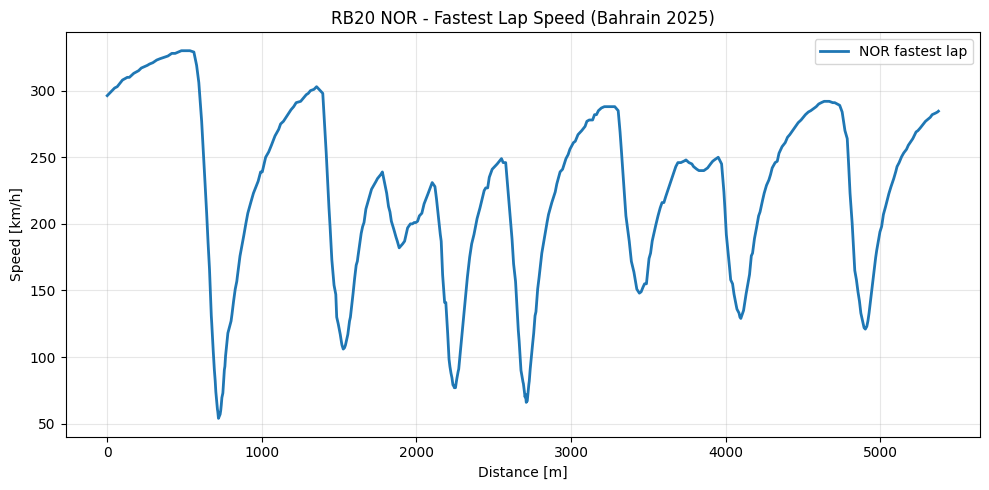


Fastest lap time: 0 days 00:01:35.728000
Lap number: 38.0


In [ ]:
import fastf1
import os
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt

# Enable FastF1's plotting defaults
fastf1.plotting.setup_mpl()

# Create cache dir and enable cache
os.makedirs("cache", exist_ok=True)
fastf1.Cache.enable_cache("cache")

# 1. Load session
session = fastf1.get_session(2025, "Bahrain", "R")
session.load()

# 2. Get all laps
laps = session.laps

# 3. Filter to Red Bull (RB20)
rb_laps = laps.pick_teams("McLaren")

# 4. FIXED: Get Red Bull drivers correctly
rb_drivers = rb_laps['Driver'].unique()  # Use 'Driver' column, not 'VER'
print("Red Bull drivers found:", rb_drivers)  # Shows 'VER', 'PER' etc.

driver_code = rb_drivers[1]  # First driver (usually VER)

# 5. Get that driver's fastest lap
drv_fast_lap = rb_laps.pick_drivers(driver_code).pick_fastest()

# 6. Get telemetry + distance
tel = drv_fast_lap.get_telemetry().add_distance()

# 7. Plot Speed vs Distance
plt.figure(figsize=(10, 5))
plt.plot(tel['Distance'], tel['Speed'], label=f"{driver_code} fastest lap", linewidth=2)
plt.xlabel("Distance [m]")
plt.ylabel("Speed [km/h]")
plt.title(f"RB20 {driver_code} - Fastest Lap Speed (Bahrain 2025)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Bonus: Print some lap stats
print(f"\nFastest lap time: {drv_fast_lap['LapTime']}")
print(f"Lap number: {drv_fast_lap['LapNumber']}")
